In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F

In [34]:
X = torch.Tensor([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]])
Y = torch.Tensor([[0], [0], [0], [1], [1], [1]])

For binary classification problems, we could use a sigmoid function:
$$ H(x) = sigmoid(wx + b) = \frac{1}{1 + \exp^{-(wx + b)}} $$

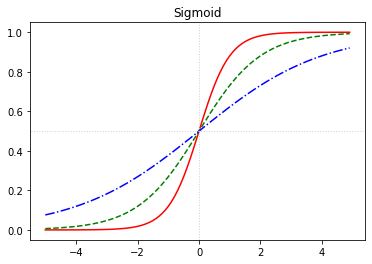

In [95]:
import numpy as np
import matplotlib.pyplot as plt

sigmoid = lambda x: 1 / (1 + np.exp(-x))
x = np.arange(start=-5, stop=5, step=0.1)

plt.plot(x, sigmoid(2 * x), 'r-', x, sigmoid(x), 'g--', x, sigmoid(0.5 * x), 'b-.')
plt.axhline(0.5, -5, 5, color='lightgray', linestyle=':', linewidth='1')
plt.axvline(0, 0, 1, color='lightgray', linestyle=':', linewidth='1')

plt.title("Sigmoid")
plt.show()

In [31]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = torch.optim.SGD([W, b], lr=1)

n_epochs = 1000
for epoch in range(1, n_epochs + 1):
    hypothesis = torch.sigmoid(X.matmul(W) + b)
    loss = F.binary_cross_entropy(hypothesis, target=Y)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        prediction = hypothesis >= torch.Tensor([.5])
        is_correct = prediction.float() == Y
        accuracy = is_correct.sum().item() / len(is_correct)
        print(f'epoch: {epoch:04d}/{n_epochs}\taccuracy: {accuracy:.4f}\tloss: {loss.item():.6f}')

epoch: 0050/1000	accuracy: 0.8333	loss: 0.273294
epoch: 0100/1000	accuracy: 1.0000	loss: 0.135644
epoch: 0150/1000	accuracy: 1.0000	loss: 0.101239
epoch: 0200/1000	accuracy: 1.0000	loss: 0.080964
epoch: 0250/1000	accuracy: 1.0000	loss: 0.067579
epoch: 0300/1000	accuracy: 1.0000	loss: 0.058062
epoch: 0350/1000	accuracy: 1.0000	loss: 0.050938
epoch: 0400/1000	accuracy: 1.0000	loss: 0.045398
epoch: 0450/1000	accuracy: 1.0000	loss: 0.040962
epoch: 0500/1000	accuracy: 1.0000	loss: 0.037327
epoch: 0550/1000	accuracy: 1.0000	loss: 0.034293
epoch: 0600/1000	accuracy: 1.0000	loss: 0.031720
epoch: 0650/1000	accuracy: 1.0000	loss: 0.029510
epoch: 0700/1000	accuracy: 1.0000	loss: 0.027592
epoch: 0750/1000	accuracy: 1.0000	loss: 0.025909
epoch: 0800/1000	accuracy: 1.0000	loss: 0.024422
epoch: 0850/1000	accuracy: 1.0000	loss: 0.023098
epoch: 0900/1000	accuracy: 1.0000	loss: 0.021911
epoch: 0950/1000	accuracy: 1.0000	loss: 0.020841
epoch: 1000/1000	accuracy: 1.0000	loss: 0.019871


Using $\text{PyTorch}$ modules

In [38]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)
optimizer = optim.SGD(params=model.parameters(), lr=1)

n_epochs = 1000
for epoch in range(1, n_epochs + 1):
    loss = F.binary_cross_entropy(model(X), target=Y)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        prediction = model(X) >= torch.Tensor([.5])
        is_correct = prediction.float() == Y
        accuracy = is_correct.sum().item() / len(is_correct)
        print(f'epoch: {epoch:04d}/{n_epochs}\taccuracy: {accuracy:.4f}\tloss: {loss.item():.6f}')

epoch: 0050/1000	accuracy: 0.8333	loss: 0.270861
epoch: 0100/1000	accuracy: 1.0000	loss: 0.135179
epoch: 0150/1000	accuracy: 1.0000	loss: 0.100983
epoch: 0200/1000	accuracy: 1.0000	loss: 0.080803
epoch: 0250/1000	accuracy: 1.0000	loss: 0.067467
epoch: 0300/1000	accuracy: 1.0000	loss: 0.057981
epoch: 0350/1000	accuracy: 1.0000	loss: 0.050876
epoch: 0400/1000	accuracy: 1.0000	loss: 0.045349
epoch: 0450/1000	accuracy: 1.0000	loss: 0.040922
epoch: 0500/1000	accuracy: 1.0000	loss: 0.037294
epoch: 0550/1000	accuracy: 1.0000	loss: 0.034265
epoch: 0600/1000	accuracy: 1.0000	loss: 0.031696
epoch: 0650/1000	accuracy: 1.0000	loss: 0.029490
epoch: 0700/1000	accuracy: 1.0000	loss: 0.027574
epoch: 0750/1000	accuracy: 1.0000	loss: 0.025894
epoch: 0800/1000	accuracy: 1.0000	loss: 0.024408
epoch: 0850/1000	accuracy: 1.0000	loss: 0.023085
epoch: 0900/1000	accuracy: 1.0000	loss: 0.021899
epoch: 0950/1000	accuracy: 1.0000	loss: 0.020830
epoch: 1000/1000	accuracy: 1.0000	loss: 0.019861


[Reference](https://wikidocs.net/58686)